<a href="https://colab.research.google.com/github/Gcango/Analise_Vendas_Soft_You/blob/main/Soft_You_Analise_de_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Exercicio adaptado ao Curso Analise de Dados de RM.
A base de Dados de Vendas da rede de lojas afecto ao Soft_You esta em Excel. O desafio que se pressuõe neste exercício, é analisar os dados de vendas de Base de Dados em XLS, que para tal deverá ser explorada ao máximo, e com diferentes operações de analise de dados deve-se descobrir insights valiosos para Soft_You. A questões que se pretende ver respondidas são:
a) - Quais lojas mais vendem?
b) - Quais produtos mais vendem?
c) - Quais lojas geram maior receita?
d) - Quais produtos geram maior receita?
e) - Existe algum cliente que gera maior receita?
f) - Qual o tempo médio entre compra e pagamento?
g) - Existe alguma loja em que esse tempo é menor E produto?
h) - Existe alguma receita usando combinação entre
produto e loja que mais se destaca?
i) - Qual produto gera maior inadimplência?
j) - Qual loja tem maior inadimplência?
k) - Existe sazonalidade? por loja? por produto?
l) - As vendas estão crescendo a cada ano?
m) - A loja que mais vende é a que mais gera
inadimplência?
n) - Existe alguma relação entre idade e
inadimplência?
o) - É possível prever inadimplência através dos
dados idade, cidade e produto?

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
bd_Clientes = pd.read_excel("/content/caso_estudo.xlsx", sheet_name='clientes')
bd_Lojas = pd.read_excel("/content/caso_estudo.xlsx", sheet_name='lojas')
bd_Produtos = pd.read_excel("/content/caso_estudo.xlsx", sheet_name='produtos')
bd_Vendas = pd.read_excel("/content/caso_estudo.xlsx", sheet_name='vendas')
bd_Pagamento = pd.read_excel("/content/caso_estudo.xlsx", sheet_name='pagamentos')

In [4]:
##Explorando e Analisando de forma preliminar os dados

In [5]:
bd_Clientes.head()

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953


In [6]:
bd_Lojas.head()

,id,cidade
0,1,Lisboa
1,2,Porto
2,3,Coimbra
3,4,Castelo Branco
4,5,Braga


In [7]:
bd_Vendas.head()

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05


In [8]:
bd_Pagamento.head()

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15


In [9]:
bd_Produtos.tail(5)

,id,produto,valor
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [10]:
bd_Clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1000 non-null   int64 
 1   nome     996 non-null    object
 2   sexo     996 non-null    object
 3   dt_nasc  996 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [11]:
bd_Lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   cidade  10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [12]:
bd_Produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       10 non-null     int64  
 1   produto  10 non-null     object 
 2   valor    10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 368.0+ bytes


In [13]:
bd_Vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          3000 non-null   int64         
 1   id_cliente  3000 non-null   int64         
 2   id_loja     3000 non-null   int64         
 3   id_produto  3000 non-null   int64         
 4   dt_venda    3000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 117.3 KB


In [14]:
bd_Pagamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        2072 non-null   int64         
 1   id_venda  2072 non-null   int64         
 2   dt_pgto   2072 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 48.7 KB


In [15]:
bd_Clientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [16]:
bd_Lojas.isnull().sum()

id        0
cidade    0
dtype: int64

In [17]:
bd_Produtos.isnull().sum()

id         0
produto    0
valor      0
dtype: int64

In [18]:
bd_Vendas.isnull().sum()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [19]:
bd_Pagamento.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

In [20]:
bd_Vendas.describe()

,id,id_cliente,id_loja,id_produto
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [21]:
bd_Pagamento.describe()

,id,id_venda
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


In [22]:
##Limpeza dos dados nulos e Outliers

In [23]:
bd_Clientes.loc[bd_Clientes.nome.isnull(),'nome'] = 'Sem Nome'
bd_Clientes.loc[bd_Clientes.sexo.isnull(),'sexo'] = 'O'
bd_Clientes.loc[bd_Clientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2023'

In [24]:
bd_Clientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,Sem Nome,M,1/1/2023
287,288,Victor Ribeiro,O,12/17/1974


In [25]:
bd_Clientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [26]:
bd_Produtos.loc[9, 'valor'] = bd_Produtos.valor[9]/10000
bd_Produtos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


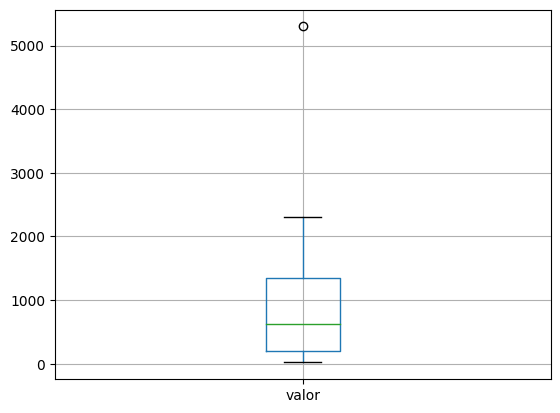

In [27]:
bd_Produtos.boxplot(column=['valor']);

In [28]:
##Revendo a Consistencia das Base de Dados

In [29]:
bd_Vendas[~bd_Vendas.id_cliente.isin(bd_Clientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [30]:
bd_Vendas[~bd_Vendas.id_loja.isin(bd_Lojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [31]:
bd_Vendas[~bd_Vendas.id_produto.isin(bd_Produtos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [32]:
bd_Pagamento[~bd_Pagamento.id_venda.isin(bd_Vendas.id)]

,id,id_venda,dt_pgto


In [33]:
bd_Vendas[~bd_Vendas.id.isin(bd_Pagamento.id_venda)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

In [34]:
##Revendo dados Duplicados das Base de Dados

In [35]:
bd_Clientes[bd_Clientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [36]:
bd_Clientes.drop('id', axis=1).duplicated().sum()

0

In [37]:
bd_Produtos.produto.duplicated().sum()

0

In [38]:
bd_Lojas.cidade.duplicated().sum()

0

In [39]:
bd_Vendas[bd_Vendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [40]:
bd_Vendas[(bd_Vendas.id_cliente == 559) & (bd_Vendas.id_loja == 2) & (bd_Vendas.id_produto == 5)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [41]:
#Ainda assim consideramos Duas compras para o mesmo Produto.

In [42]:
bd_Pagamento.drop('id', axis=1).duplicated().sum()

0

In [43]:
#Organizando as Datas da Bd_Cliente

In [44]:
bd_Clientes.dt_nasc = pd.to_datetime(bd_Clientes.dt_nasc, format='%m/%d/%Y')
bd_Clientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


In [45]:
#Mudando os Indexes

In [46]:
bd_Clientes = bd_Clientes.set_index('id')

bd_Clientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [47]:
bd_Clientes.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
             991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
           dtype='int64', name='id', length=1000)

In [48]:
bd_Lojas = bd_Lojas.set_index('id')
bd_Produtos = bd_Produtos.set_index('id')
bd_Vendas = bd_Vendas.set_index('id')
bd_Pagamento = bd_Pagamento.set_index('id')

In [49]:
bd_Lojas

,cidade
id,
1,Lisboa
2,Porto
3,Coimbra
4,Castelo Branco
5,Braga
6,Aveiro
7,Viseu
8,Guarda
9,Evora


##Unindo as Base de dados

In [50]:
dados = bd_Vendas.join(bd_Clientes.add_prefix('cliente_'), on='id_cliente')
dados = dados.join(bd_Lojas.add_prefix('lojas_'), on='id_loja')
dados = dados.join(bd_Produtos.add_prefix('produto_'), on='id_produto')
dados

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Evora,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Evora,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Viseu,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Castelo Branco,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Evora,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Coimbra,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Guarda,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Porto,laptop gamer,5300.0


In [51]:
dados = dados.join(bd_Pagamento.set_index('id_venda'))

In [52]:
dados

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Evora,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Evora,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Viseu,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Castelo Branco,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Evora,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Coimbra,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Guarda,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Porto,laptop gamer,5300.0,NaT


In [53]:
dados.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
lojas_cidade         0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

In [54]:
dados.sample(5)

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
764,593,10,9,2018-09-14,Fernanda Goncalves,F,1974-06-13,Algarve,mesa,860.0000,2018-10-05
763,656,2,3,2018-09-14,Martim Cavalcanti,M,1978-06-27,Porto,laptop básico,2300.0000,NaT
2351,895,2,10,2020-03-03,Rafael Azevedo,M,1975-09-18,Porto,xxx-231a,321.1352,NaT
2634,615,7,3,2020-06-02,José Almeida,M,1971-06-30,Viseu,laptop básico,2300.0000,2020-06-06
1127,402,2,8,2019-01-05,Clara Melo,F,1959-02-12,Porto,cadeira,540.0000,NaT


##Criando Variaveis Novas como Tempo de Pagto, Pagamento e  Idade do Cliente para responder posteriores perguntas.

In [55]:
dados.columns

Index(['id_cliente', 'id_loja', 'id_produto', 'dt_venda', 'cliente_nome',
       'cliente_sexo', 'cliente_dt_nasc', 'lojas_cidade', 'produto_produto',
       'produto_valor', 'dt_pgto'],
      dtype='object')

In [59]:
dados['Pagto'] = 1
dados.loc[dados.dt_pgto.isnull(), 'Pagto'] = 0
dados.sample(5)

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,Pagto
id,,,,,,,,,,,,
2419,619,4,1,2020-03-28,Otávio Santos,M,1974-06-08,Castelo Branco,mouse,20.0,2020-04-05,1
2253,324,2,3,2020-01-30,Letícia Fernandes,F,1951-09-10,Porto,laptop básico,2300.0,NaT,0
229,8,2,3,2018-03-28,Gabrielly Almeida,F,1997-07-14,Porto,laptop básico,2300.0,NaT,0
153,436,2,9,2018-02-24,Ana Correia,F,1952-06-28,Porto,mesa,860.0,2018-03-24,1
859,432,2,9,2018-10-12,André Santos,M,1988-06-25,Porto,mesa,860.0,2018-11-09,1


In [61]:
#data_do_pagamento - data_de_vendas
dados['Tempo_Pagto'] = (dados.dt_pgto - dados.dt_venda).dt.days
dados.sample(5)

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,Pagto,Tempo_Pagto
id,,,,,,,,,,,,,
923,710,2,3,2018-10-29,Vitór Souza,M,1983-09-04,Porto,laptop básico,2300.0,NaT,0,NaN
1185,771,2,3,2019-02-01,Renan Pereira,M,1948-02-16,Porto,laptop básico,2300.0,NaT,0,NaN
224,787,5,6,2018-03-27,Kai Almeida,M,1969-10-31,Braga,impressora,700.0,2018-04-17,1,21.0
1379,918,1,3,2019-04-02,Sophia Cunha,F,1966-06-27,Lisboa,laptop básico,2300.0,2019-04-25,1,23.0
2359,858,2,3,2020-03-08,Fernanda Pinto,F,1960-08-25,Porto,laptop básico,2300.0,2020-03-08,1,0.0


In [62]:
#Aplicando o Numpy para calcular a idade de cada cliente

dados['cliente_idade'] = np.floor((pd.to_datetime('today') - dados.cliente_dt_nasc)/np.timedelta64(1, 'Y'))
dados.sample(5)

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,Pagto,Tempo_Pagto,cliente_idade
id,,,,,,,,,,,,,,
2876,549,2,3,2020-08-13,Daniel Sousa,M,1946-01-09,Porto,laptop básico,2300.0,2020-09-22,1,40.0,78.0
2360,89,4,3,2020-03-08,Fernanda Barbosa,F,1961-04-18,Castelo Branco,laptop básico,2300.0,2020-03-09,1,1.0,62.0
178,659,6,3,2018-03-05,Matheus Sousa,M,1944-04-07,Aveiro,laptop básico,2300.0,2018-04-08,1,34.0,79.0
1492,896,2,3,2019-05-16,Melissa Lima,F,1936-02-24,Porto,laptop básico,2300.0,NaT,0,NaN,87.0
700,632,5,5,2018-08-23,Victor Rocha,M,1970-10-22,Braga,monitor,1500.0,2018-10-06,1,44.0,53.0


##Respondendo as questões:

In [74]:
#a) - Quais lojas mais vendem?

In [73]:
dados.columns

Index(['id_cliente', 'id_loja', 'id_produto', 'dt_venda', 'cliente_nome',
       'cliente_sexo', 'cliente_dt_nasc', 'lojas_cidade', 'produto_produto',
       'produto_valor', 'dt_pgto', 'Pagto', 'Tempo_Pagto', 'cliente_idade'],
      dtype='object')

In [71]:
lojas_qm_vend = dados.groupby('lojas_cidade').count().produto_valor.sort_values(ascending=False)
lojas_qm_vend

lojas_cidade
Porto             1087
Viseu              234
Algarve            231
Guarda             223
Castelo Branco     221
Aveiro             211
Lisboa             207
Evora              202
Coimbra            193
Braga              191
Name: produto_valor, dtype: int64

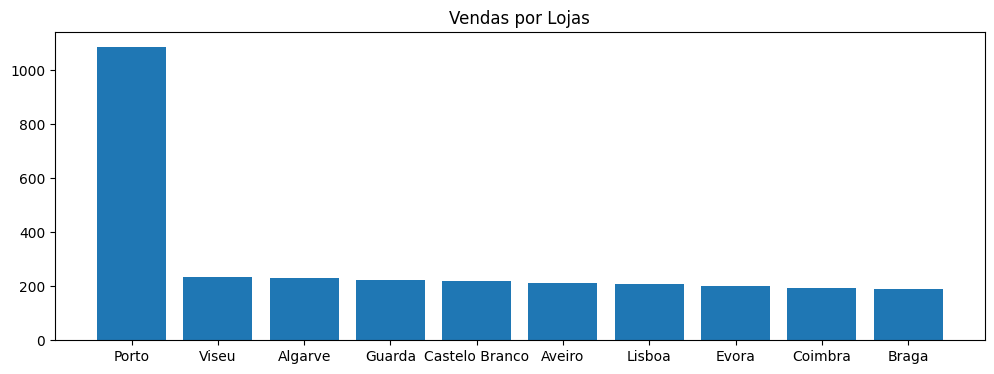

In [81]:
##-> projectando o gráfico para essa questão:
plt.figure(figsize=(12, 4))
plt.bar(lojas_qm_vend.index, lojas_qm_vend.values)
plt.title('Vendas por Lojas');

In [ ]:
#b) - Quais produtos mais vendem?

In [75]:
dados.columns

Index(['id_cliente', 'id_loja', 'id_produto', 'dt_venda', 'cliente_nome',
       'cliente_sexo', 'cliente_dt_nasc', 'lojas_cidade', 'produto_produto',
       'produto_valor', 'dt_pgto', 'Pagto', 'Tempo_Pagto', 'cliente_idade'],
      dtype='object')

In [76]:
prodts_qm_vend = dados.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
prodts_qm_vend

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

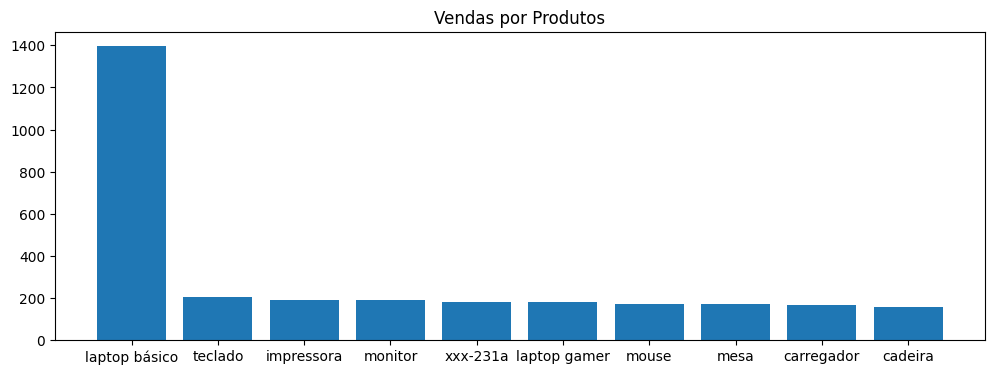

In [80]:
##-> projectando o gráfico para essa questão:
plt.figure(figsize=(12, 4))
plt.bar(prodts_qm_vend.index, prodts_qm_vend.values)
plt.title('Vendas por Produtos');

In [ ]:
#c) - Quais lojas geram maior receita?

In [78]:
dados.sample(3)

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,Pagto,Tempo_Pagto,cliente_idade
id,,,,,,,,,,,,,,
551,28,4,3,2018-07-05,Pedro Rocha,M,1943-07-19,Castelo Branco,laptop básico,2300.0,2018-08-05,1,31.0,80.0
2485,827,6,2,2020-04-13,Alex Almeida,M,1984-12-03,Aveiro,teclado,30.0,NaT,0,NaN,39.0
1036,267,8,3,2018-12-07,Maria Melo,F,1947-08-09,Guarda,laptop básico,2300.0,2019-01-07,1,31.0,76.0


In [83]:
maior_receita = dados[['lojas_cidade','produto_valor']].groupby('lojas_cidade').sum().produto_valor.sort_values(ascending=False)
maior_receita

lojas_cidade
Porto             1.797907e+06
Guarda            3.779836e+05
Castelo Branco    3.757225e+05
Viseu             3.752382e+05
Algarve           3.655850e+05
Lisboa            3.407579e+05
Aveiro            3.329236e+05
Evora             3.168370e+05
Braga             3.133314e+05
Coimbra           3.032404e+05
Name: produto_valor, dtype: float64

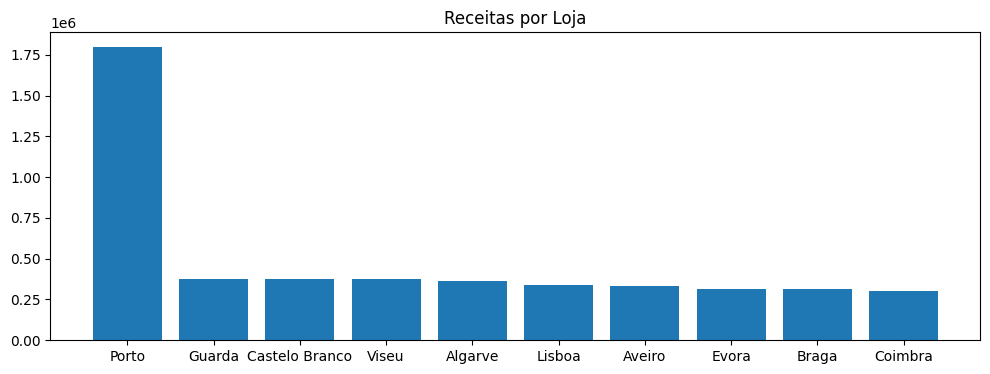

In [84]:
##-> projectando o gráfico para essa questão:
plt.figure(figsize=(12, 4))
plt.bar(maior_receita.index, maior_receita.values)
plt.title('Receitas por Loja');

In [97]:
lp = maior_receita.max()
loth = maior_receita[maior_receita!=maior_receita.max()].mean()
dif_lploth = lp - loth

print(f"O maior valor de produto vendido é {lp:.2f}")
print(f"A media de venda da demais lojas excepto Porto é de {loth:.2f}")
print(f"A diferença entre a receita da loja do Porto e as demais lojas, é de {dif_lploth:.2f}")

O maior valor de produto vendido é 1797906.98
A media de venda da demais lojas excepto Porto é de 344624.40
A diferença entre a receita da loja do Porto e as demais lojas, é de 1453282.57


In [ ]:
#d) - Quais produtos geram maior receita?

In [98]:
dados.columns

Index(['id_cliente', 'id_loja', 'id_produto', 'dt_venda', 'cliente_nome',
       'cliente_sexo', 'cliente_dt_nasc', 'lojas_cidade', 'produto_produto',
       'produto_valor', 'dt_pgto', 'Pagto', 'Tempo_Pagto', 'cliente_idade'],
      dtype='object')

In [99]:
receita_por_prodt = dados[['produto_produto','produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
receita_por_prodt

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

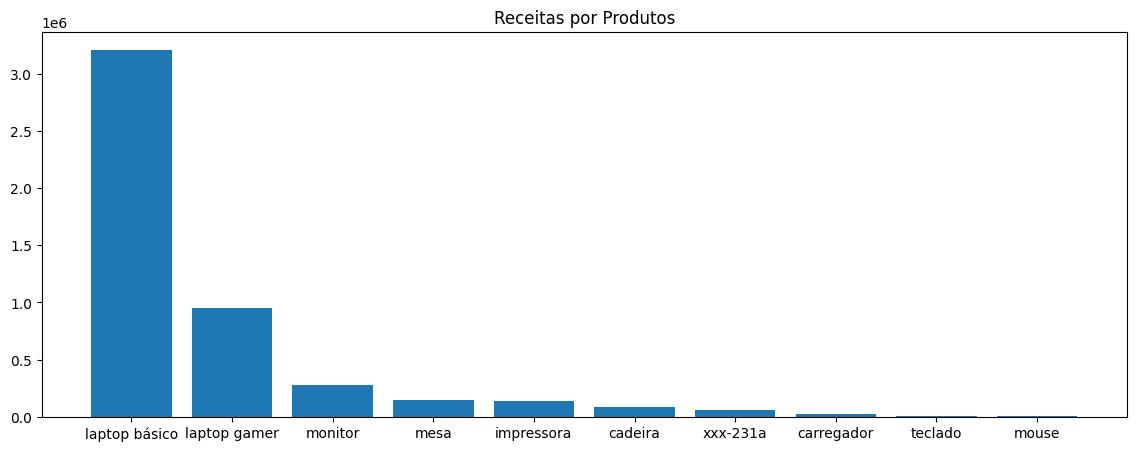

In [112]:
##-> projectando o gráfico para essa questão:
plt.figure(figsize=(14, 5))
plt.bar(receita_por_prodt.index, receita_por_prodt.values)
plt.title('Receitas por Produtos');

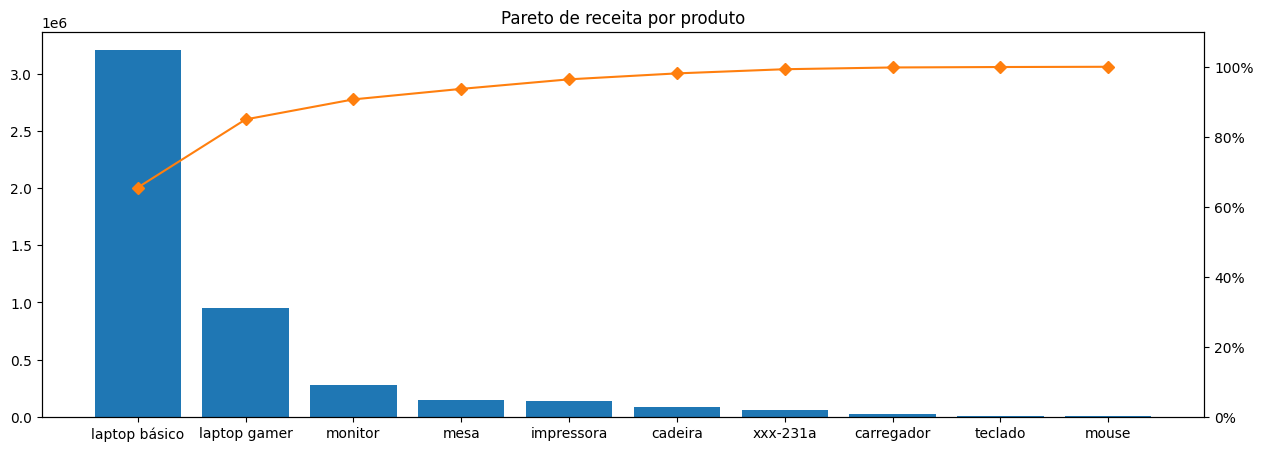

In [127]:
##-> projectando o gráfico PARETO PARA UMA VISUALIZAÇÃO DIFERENCIADA:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(receita_por_prodt.index, receita_por_prodt.values, color='C0')
ax2 = ax.twinx()
ax2.plot(receita_por_prodt.index, receita_por_prodt.values.cumsum()/receita_por_prodt.values.sum()*100, color='C1', marker='D')
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.ylim(0,110)
plt.title('Pareto de receita por produto');

In [ ]:
#e) - Existe algum cliente que gera maior receita?

In [102]:
dados.columns

Index(['id_cliente', 'id_loja', 'id_produto', 'dt_venda', 'cliente_nome',
       'cliente_sexo', 'cliente_dt_nasc', 'lojas_cidade', 'produto_produto',
       'produto_valor', 'dt_pgto', 'Pagto', 'Tempo_Pagto', 'cliente_idade'],
      dtype='object')

In [103]:
receita_por_cliente = dados[['cliente_nome','produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False)
receita_por_cliente

cliente_nome
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
                       ...    
Julieta Barros         20.0000
Thaís Pinto            20.0000
Giovana Barbosa        20.0000
Diego Sousa            20.0000
José Pinto             20.0000
Name: produto_valor, Length: 861, dtype: float64

In [106]:
client_comp = receita_por_cliente.head(10)
print(f"Os dez cliente que mais Compram são: {client_comp} ")

Os dez cliente que mais Compram são: cliente_nome
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
Sem Nome            21721.1352
Luana Pinto         20881.1352
Melissa Ferreira    20470.0000
Yasmin Silva        19890.0000
Kauan Almeida       19762.2704
Name: produto_valor, dtype: float64 


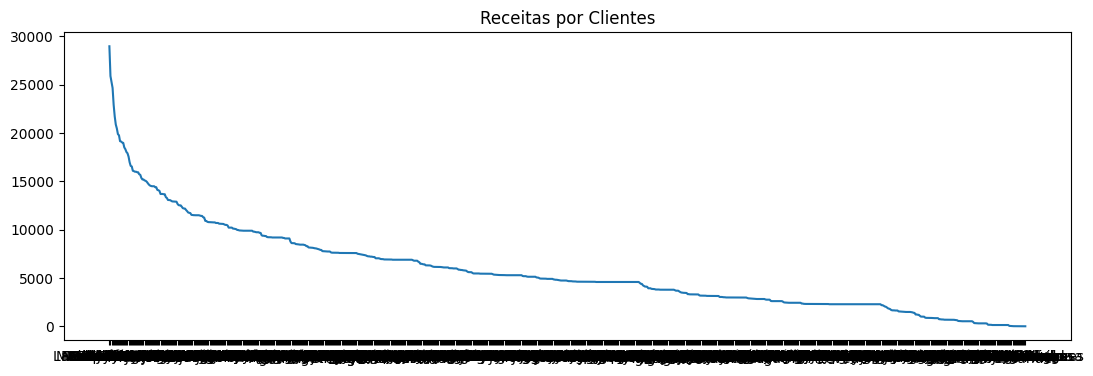

In [125]:
##-> projectando o gráfico para essa questão:
plt.figure(figsize=(13, 4))
plt.plot(receita_por_cliente.index, receita_por_cliente.values)
plt.title('Receitas por Clientes');

In [117]:
from matplotlib.ticker import PercentFormatter

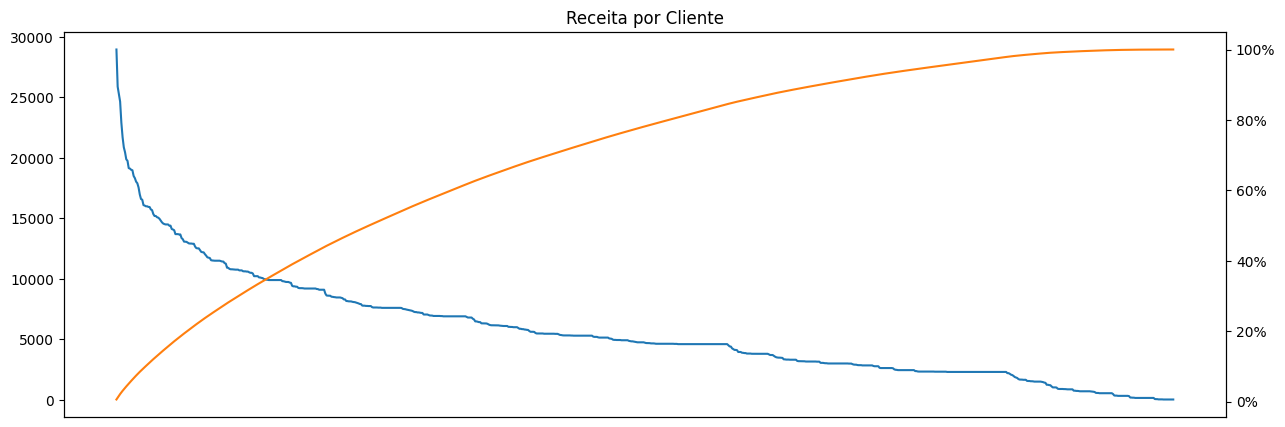

In [123]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(receita_por_cliente.index, receita_por_cliente.values, color='C0')
ax2 = ax.twinx()
ax2.plot(receita_por_cliente.index, receita_por_cliente.values.cumsum()/receita_por_cliente.values.sum()*100, color='C1')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.axes.get_xaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.title('Receita por Cliente');

In [121]:
receita_acumulada = receita_por_cliente.cumsum()/receita_por_cliente.sum()
qtd_cliente = receita_acumulada[receita_acumulada<0.60].count()
repr_client = receita_acumulada[receita_acumulada<0.60].count()/receita_acumulada.count()
print(f" {qtd_cliente} Clientes geram a receita das lojas de até 60% ")
print(f" Aproximadamente {repr_client:.2f} % dos clientes representam 60% da receita ")

 273 Clientes geram a receita das lojas de até 60% 
 Aproximadamente 0.32 % dosi clientes representam 60% da receita 


In [ ]:
#f) - Qual o tempo médio entre compra e pagamento?

In [147]:
dados.columns

Index(['id_cliente', 'id_loja', 'id_produto', 'dt_venda', 'cliente_nome',
       'cliente_sexo', 'cliente_dt_nasc', 'lojas_cidade', 'produto_produto',
       'produto_valor', 'dt_pgto', 'Pagto', 'Tempo_Pagto', 'cliente_idade'],
      dtype='object')

In [149]:
dados.Tempo_Pagto.describe()

count    2072.000000
mean       22.472008
std        13.256384
min         0.000000
25%        11.000000
50%        22.000000
75%        34.000000
max        45.000000
Name: Tempo_Pagto, dtype: float64

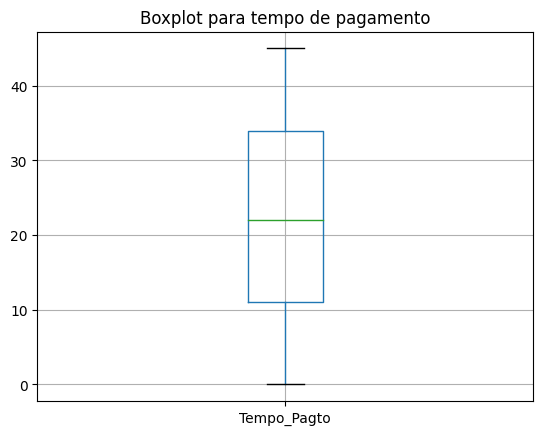

In [150]:
dados.boxplot('Tempo_Pagto')
plt.title('Boxplot para tempo de pagamento');

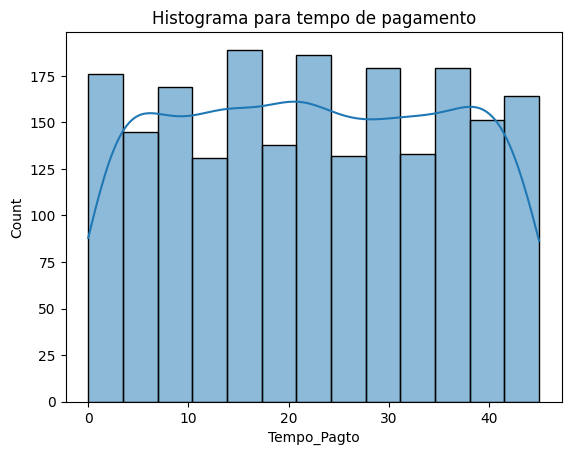

In [152]:
sns.histplot(data=dados.Tempo_Pagto, kde=True)
plt.title('Histograma para tempo de pagamento');

In [161]:
tmp = dados['Tempo_Pagto'].mean()
tmm = dados['Tempo_Pagto'].min()
tmmx = dados['Tempo_Pagto'].max()
print(f"O tempo médio de Pagamento é de {tmp:.2f} dias ")
print(f"O tempo minimo de Pagamento é de {tmm:.2f} dias ")
print(f"O tempo máximo de Pagamento é de {tmmx:.2f} dias ")
print("Esta Variavél possui uma distribuição Uniforme o que parece ser um bom sinal")
print("Com base nesta variavel podemos ainda afirmar que não existe previsibilidade no tempo de entrega")

O tempo médio de Pagamento é de 22.47 dias 
O tempo minimo de Pagamento é de 0.00 dias 
O tempo máximo de Pagamento é de 45.00 dias 
Esta Variavél possui uma distribuição Uniforme o que parece ser um bom sinal
Com base nesta variavel podemos ainda afirmar que não existe previsibilidade no tempo de entrega


In [ ]:
#g) - Existe alguma loja em que esse tempo é menor? E produto?

In [166]:
dados.sample(3)

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,lojas_cidade,produto_produto,produto_valor,dt_pgto,Pagto,Tempo_Pagto,cliente_idade
id,,,,,,,,,,,,,,
1565,317,6,3,2019-06-09,Thiago Martins,M,1952-03-03,Aveiro,laptop básico,2300.0,2019-07-15,1,36.0,71.0
2952,889,9,6,2020-09-12,Kauan Ferreira,M,1954-08-28,Evora,impressora,700.0,2020-10-05,1,23.0,69.0
2382,103,2,3,2020-03-12,Bianca Cavalcanti,F,1986-09-25,Porto,laptop básico,2300.0,NaT,0,NaN,37.0


In [163]:
dados.groupby('lojas_cidade').mean().Tempo_Pagto

lojas_cidade
Algarve           22.710660
Aveiro            22.301075
Braga             19.769231
Castelo Branco    21.430939
Coimbra           23.550898
Evora             23.294444
Guarda            22.269430
Lisboa            23.087432
Porto             23.363855
Viseu             21.644860
Name: Tempo_Pagto, dtype: float64

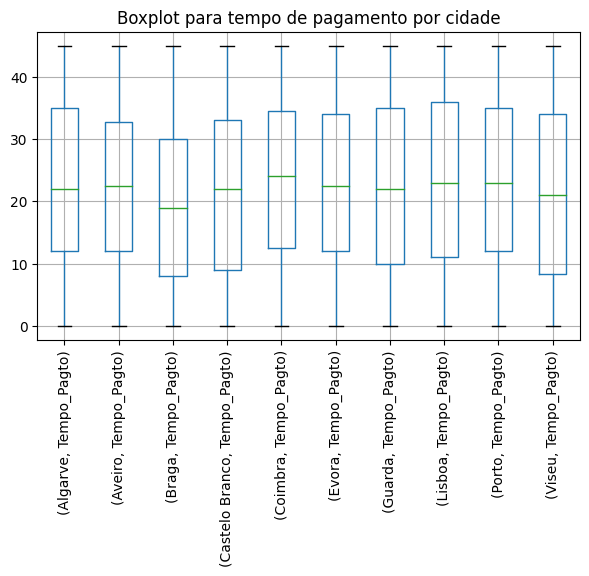

In [165]:
plt.figure(figsize=(7,4))
dados[['lojas_cidade','Tempo_Pagto']].groupby('lojas_cidade').boxplot('Tempo_Pagto')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

In [167]:
dados.groupby('produto_produto').mean().Tempo_Pagto

produto_produto
cadeira          23.734513
carregador       22.051724
impressora       21.383459
laptop básico    22.980513
laptop gamer     21.763889
mesa             20.300885
monitor          22.021277
mouse            22.912698
teclado          22.104575
xxx-231a         21.823077
Name: Tempo_Pagto, dtype: float64

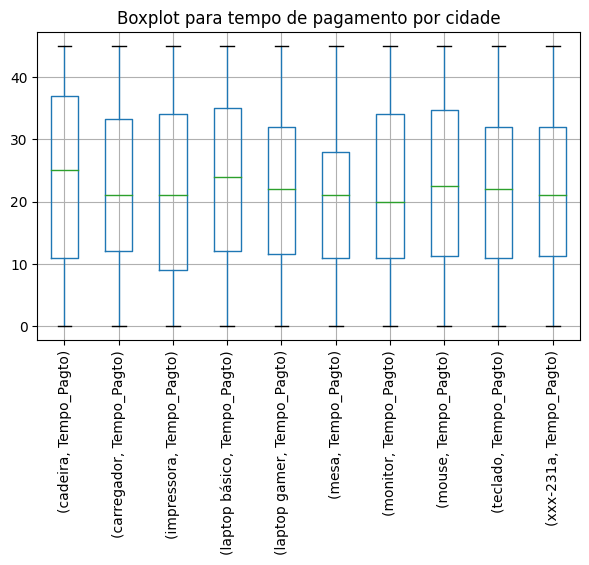

In [168]:
plt.figure(figsize=(7,4))
dados[['produto_produto','Tempo_Pagto']].groupby('produto_produto').boxplot('Tempo_Pagto')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#h) - Existe alguma receita usando combinação entre produto e loja que mais se destaca?

In [128]:
dados.columns

Index(['id_cliente', 'id_loja', 'id_produto', 'dt_venda', 'cliente_nome',
       'cliente_sexo', 'cliente_dt_nasc', 'lojas_cidade', 'produto_produto',
       'produto_valor', 'dt_pgto', 'Pagto', 'Tempo_Pagto', 'cliente_idade'],
      dtype='object')

In [138]:
Comb_prod_loja = pd.DataFrame(columns=('loja', 'produto', 'receita'))
for cidade in bd_Lojas.cidade:
    for produto in bd_Produtos.produto:
        Comb_prod_loja = pd.concat([pd.DataFrame({
            'loja' : [cidade],
            'produto' : [produto],
            'receita' : [dados.produto_valor[(dados.lojas_cidade == cidade) & (dados.produto_produto == produto)].sum()]
        }), Comb_prod_loja], ignore_index=True)
Comb_prod_loja

,loja,produto,receita
0,Algarve,xxx-231a,7064.9744
1,Algarve,mesa,12040.0000
2,Algarve,cadeira,5400.0000
3,Algarve,carregador,2100.0000
4,Algarve,impressora,8400.0000
...,...,...,...
95,Lisboa,monitor,30000.0000
96,Lisboa,laptop gamer,63600.0000
97,Lisboa,laptop básico,223100.0000
98,Lisboa,teclado,510.0000


<Axes: xlabel='produto', ylabel='loja'>

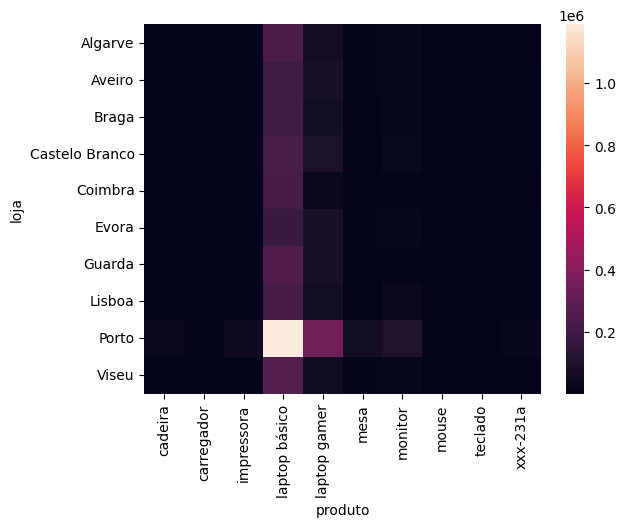

In [142]:
Comb_prod_loja = Comb_prod_loja.pivot_table(index='loja', columns='produto', values='receita', aggfunc='sum')
sns.heatmap(Comb_prod_loja)

In [143]:
Comb_prod_loja = pd.DataFrame(columns=('loja', 'produto', 'receita'))
for cidade in bd_Lojas.cidade:
    for produto in bd_Produtos.produto:
        Comb_prod_loja = pd.concat([pd.DataFrame({
            'loja' : [cidade],
            'produto' : [produto],
            'receita' : [dados.produto_valor[(dados.lojas_cidade == cidade) & (dados.produto_produto == produto)].sum()]
        }), Comb_prod_loja], ignore_index=True)
Comb_prod_loja = Comb_prod_loja.sort_values(by="receita", ascending=False)
Comb_prod_loja

,loja,produto,receita
87,Porto,laptop básico,1189100.0
86,Porto,laptop gamer,344500.0
37,Viseu,laptop básico,264500.0
27,Guarda,laptop básico,250700.0
7,Algarve,laptop básico,241500.0
...,...,...,...
29,Guarda,mouse,220.0
39,Viseu,mouse,220.0
59,Braga,mouse,200.0
69,Castelo Branco,mouse,200.0


In [144]:
Comb_prod_loja['lojaprod'] = Comb_prod_loja.loja + '-' + Comb_prod_loja.produto
Comb_prod_loja

,loja,produto,receita,lojaprod
87,Porto,laptop básico,1189100.0,Porto-laptop básico
86,Porto,laptop gamer,344500.0,Porto-laptop gamer
37,Viseu,laptop básico,264500.0,Viseu-laptop básico
27,Guarda,laptop básico,250700.0,Guarda-laptop básico
7,Algarve,laptop básico,241500.0,Algarve-laptop básico
...,...,...,...,...
29,Guarda,mouse,220.0,Guarda-mouse
39,Viseu,mouse,220.0,Viseu-mouse
59,Braga,mouse,200.0,Braga-mouse
69,Castelo Branco,mouse,200.0,Castelo Branco-mouse


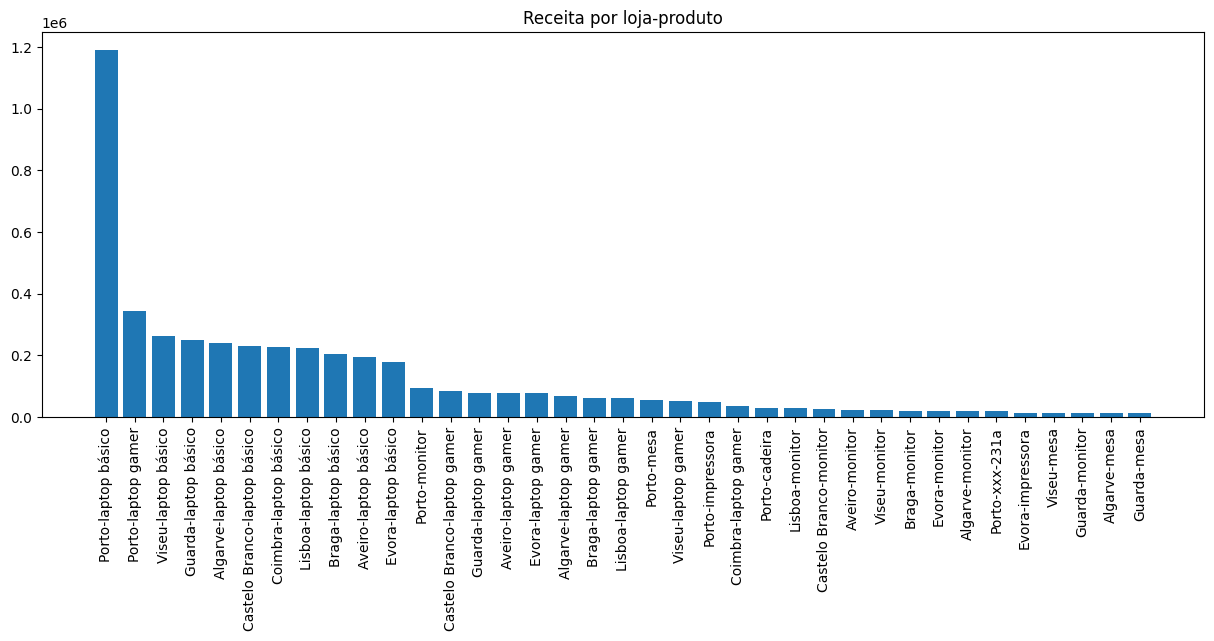

In [145]:
plt.figure(figsize=(15,5))
plt.bar(Comb_prod_loja.lojaprod[Comb_prod_loja.receita>0.01*Comb_prod_loja.receita.max()], Comb_prod_loja.receita[Comb_prod_loja.receita>0.01*Comb_prod_loja.receita.max()])
plt.xticks(rotation=90)
plt.title('Receita por loja-produto')
plt.show()

In [ ]:
#i) - Qual produto gera maior inadimplência?

In [169]:
dados.columns

Index(['id_cliente', 'id_loja', 'id_produto', 'dt_venda', 'cliente_nome',
       'cliente_sexo', 'cliente_dt_nasc', 'lojas_cidade', 'produto_produto',
       'produto_valor', 'dt_pgto', 'Pagto', 'Tempo_Pagto', 'cliente_idade'],
      dtype='object')

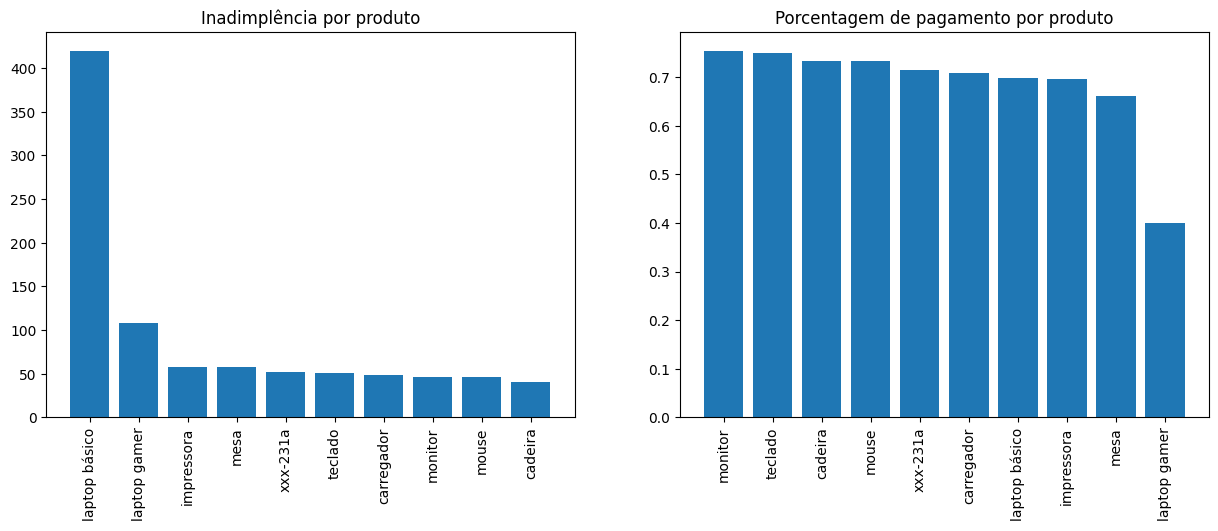

In [172]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
inadipl_prod = dados[dados.Pagto==0].groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(inadipl_prod.index, inadipl_prod.values)
plt.xticks(rotation=90)
plt.title('Inadimplência por produto')

plt.subplot(1,2,2)
inadipl_prod = dados.groupby('produto_produto').mean().Pagto.sort_values(ascending=False)
plt.bar(inadipl_prod.index, inadipl_prod.values)
plt.xticks(rotation=90)
plt.title('Porcentagem de pagamento por produto')

plt.show()

In [181]:
print("O Laptop básico é o produto com mais Inadiplencia, gerando aproximadamente 40% de pagametos")

O Laptop básico é o produto com mais Inadiplencia, gerando aproximadamente 40% de pagametos


In [ ]:
#j) - Qual loja tem maior inadimplência?

In [173]:
dados.columns

Index(['id_cliente', 'id_loja', 'id_produto', 'dt_venda', 'cliente_nome',
       'cliente_sexo', 'cliente_dt_nasc', 'lojas_cidade', 'produto_produto',
       'produto_valor', 'dt_pgto', 'Pagto', 'Tempo_Pagto', 'cliente_idade'],
      dtype='object')

In [180]:
dados[dados.Pagto == 0].groupby('lojas_cidade').count().produto_valor.sort_values(ascending=False)

lojas_cidade
Porto             672
Castelo Branco     40
Braga              35
Algarve            34
Guarda             30
Coimbra            26
Aveiro             25
Lisboa             24
Evora              22
Viseu              20
Name: produto_valor, dtype: int64

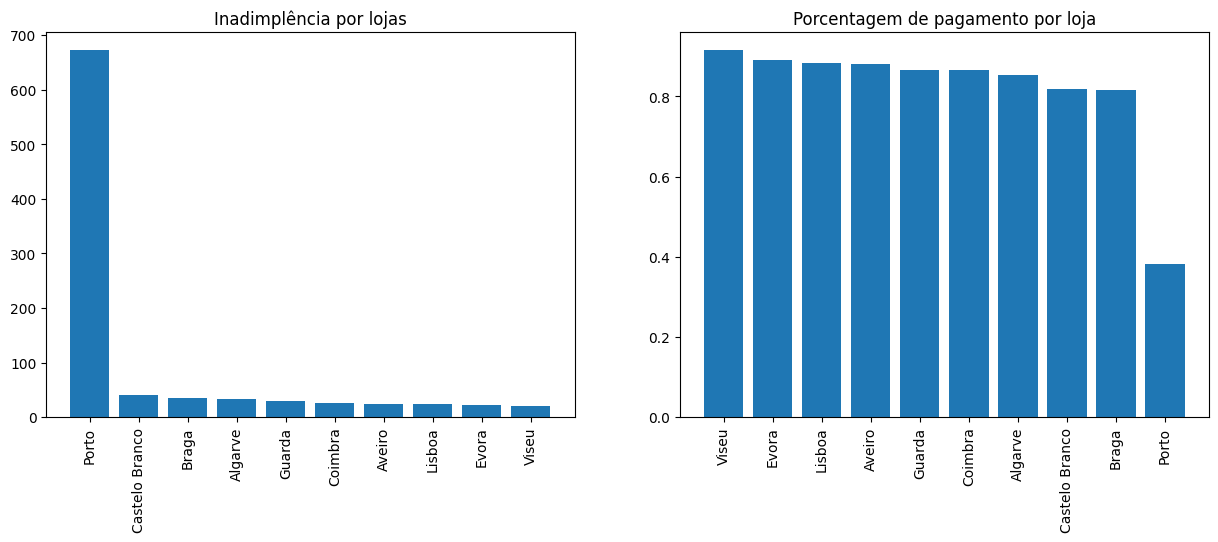

In [176]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
inadipl_lojas = dados[dados.Pagto==0].groupby('lojas_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(inadipl_lojas.index, inadipl_lojas.values)
plt.title('Inadimplência por lojas')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
inadipl_lojas = dados.groupby('lojas_cidade').mean().Pagto.sort_values(ascending=False)
plt.bar(inadipl_lojas.index, inadipl_lojas.values)
plt.title('Porcentagem de pagamento por loja')
plt.xticks(rotation=90)

plt.show()

In [182]:
print("Como era de se esperar, a cidade do Porto tem mais Inadiplencia. E gera aproximadamente 39% de pagametos")

Como era de se esperar, a cidade do Porto tem mais Inadiplencia. E gera aproximadamente 39% de pagametos
